<a href="https://colab.research.google.com/github/Vyoma-garg/Deep_Learning/blob/main/2_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation Functions

In [2]:
import math 
def sigmoid(x):
  return 1/(1+ math.exp(-x))

def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def relu(x):
  return max(0,x)

def leaky_relu(x):
  return max(0.1*x, x)

In [3]:
print(sigmoid(0.5))
print(sigmoid(80))
print(sigmoid(-67))

0.6224593312018546
1.0
7.984904245686979e-30


In [4]:
print(tanh(0.8))
print(tanh(80))
print(tanh(-78))

0.664036770267849
1.0
-1.0


In [5]:
print(relu(0.5))
print(relu(80))
print(relu(-3))

0.5
80
0


In [6]:
print(leaky_relu(0.5))
print(leaky_relu(80))
print(leaky_relu(-0.5))

0.5
80
-0.05


# Gradient Descent

Predicting if a person would buy life insurnace based on his age using logistic regression

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [8]:
url ='https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/6_gradient_descent/insurance_data.csv'
df=pd.read_csv(url)
df

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [9]:
x_train, x_test, y_train, y_test= train_test_split(df[['age', 'affordibility']], df.bought_insurance, test_size=0.2, random_state=9)
print(x_train.shape)

(22, 2)


In [10]:
#scaling

x_train_scaled= x_train.copy()
x_train_scaled['age']= x_train_scaled['age']/ 100

x_test_scaled= x_test.copy()
x_test_scaled['age']= x_test_scaled['age']/ 100

x_train_scaled

,age,affordibility
18,0.19,0
19,0.18,1
6,0.55,0
2,0.47,1
12,0.27,0
13,0.29,0
16,0.25,0
10,0.18,1
27,0.46,1
11,0.28,1


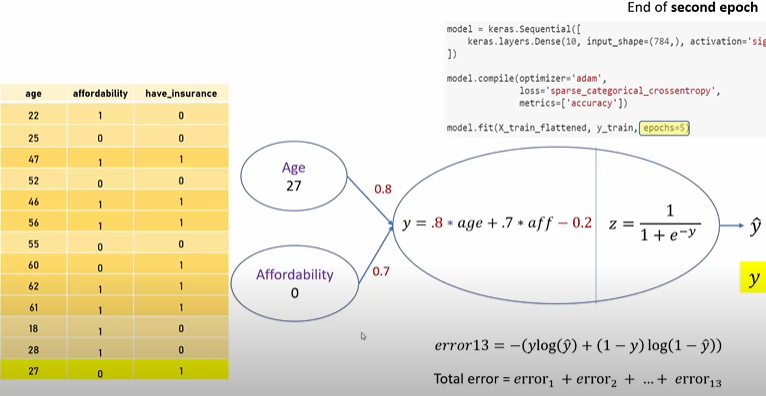

In [11]:
model= keras.Sequential([
                         keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer= 'zeros')
])

model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 8ms/step - loss: 0.5484 - accuracy: 0.9091
Epoch 2502/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5484 - accuracy: 0.9091
Epoch 2503/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5483 - accuracy: 0.9091
Epoch 2504/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5483 - accuracy: 0.9091
Epoch 2505/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5482 - accuracy: 0.9091
Epoch 2506/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5482 - accuracy: 0.9091
Epoch 2507/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5481 - accuracy: 0.9091
Epoch 2508/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5481 - accuracy: 0.9091
Epoch 2509/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5480 - accuracy: 0.9091
Epoch 2510/5000
1/1 [==============================] - 

In [12]:
model.evaluate(x_test_scaled, y_test)

1/1 [==============================] - 0s 222ms/step - loss: 0.4504 - accuracy: 0.8333


[0.45041051506996155, 0.8333333134651184]

In [13]:
model.predict(x_test_scaled)

array([[0.71188474],
       [0.755201  ],
       [0.70269346],
       [0.6131504 ],
       [0.38115507],
       [0.46767926]], dtype=float32)

In [14]:
coeff, intercept= model.get_weights()
print(coeff)
print(intercept)

[[4.4398117]
 [1.2116114]]
[-2.7933505]


In [15]:
x_test_scaled

,age,affordibility
5,0.56,1
9,0.61,1
15,0.55,1
4,0.46,1
3,0.52,0
7,0.60,0


In [16]:
y_test

5     1
9     1
15    1
4     1
3     0
7     1
Name: bought_insurance, dtype: int64

model.predict function from scratch 

In [17]:
def prediction_function(age, affordibility):
  weighted_sum= coeff[0]*age + coeff[1]* affordibility + intercept
  return sigmoid(weighted_sum)

In [18]:
prediction_function(0.56,1)

0.7118847710283468

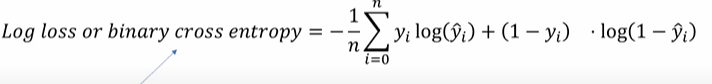

In [23]:
def log_loss(y_true, y_predicted):
  epsilon=1e-15
  y_predicted_new=[max(i, epsilon) for i in y_predicted]
  y_predicted_new= [min(i, 1-epsilon) for i in y_predicted]
  y_predicted_new= np.array(y_predicted_new)
  return -np.mean(y_true*np.log(y_predicted_new) + (1-y_true)* np.log(1-y_predicted_new))

def sigmoid_numpy(x):
  return 1/ (1+np.exp(-x))

sigmoid_numpy(np.array([12,0,1]))


array([0.99999386, 0.5       , 0.73105858])

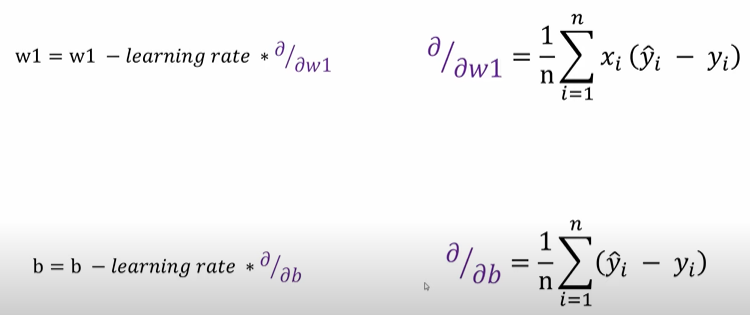

GD from scratch 

In [24]:
def gradient_descent(age, affordibility, y_true, epochs, loss_threshold):
  #w1, w2, bias
  #random init
  w1=w2=1
  bias=0
  rate=0.5
  n=len(age)
  for i in range(epochs):
    wtd_sum= w1*age + w2* affordibility +bias
    y_predicted= sigmoid_numpy(wtd_sum)

    loss= log_loss(y_true, y_predicted) 

    w1d= (1/n) * np.dot(np.transpose(age) , (y_predicted-y_true))
    w2d= (1/n) * np.dot(np.transpose(affordibility) , (y_predicted-y_true))
    biasd= np.mean(y_predicted-y_true)

    w1=w1 - rate*w1d
    w2= w2- rate*w2d
    bias= bias - rate*biasd

    print(f'Epoch:{i}, w1:{w2}, w2:{w2}, bias:{bias}, loss:{loss}')

    if loss<= loss_threshold:
      break

  return w1, w2, bias

gradient_descent(x_train_scaled['age'], x_train_scaled['affordibility'], y_train, 1000, 0.4635)

Epoch:0, w1:0.9093996372309792, w2:0.9093996372309792, bias:-0.15899971596505466, loss:0.8112923393691265
Epoch:1, w1:0.8342763027964821, w2:0.8342763027964821, bias:-0.29587120076432044, loss:0.7467829364894548
Epoch:2, w1:0.7739665146317435, w2:0.7739665146317435, bias:-0.41217449851311583, loss:0.7004872891780484
Epoch:3, w1:0.7270367334404036, w2:0.7270367334404036, bias:-0.5102466278941071, loss:0.6683042124878894
Epoch:4, w1:0.6916653859083445, w2:0.6916653859083445, bias:-0.5927373940392777, loss:0.6463777866260911
Epoch:5, w1:0.665962026575046, w2:0.665962026575046, bias:-0.6622513545917619, loss:0.6315549163989057
Epoch:6, w1:0.6481660878096478, w2:0.6481660878096478, bias:-0.721141382418129, loss:0.6214890763931213
Epoch:7, w1:0.6367391082102101, w2:0.6367391082102101, bias:-0.7714258373860241, loss:0.6145400082112615
Epoch:8, w1:0.6303875959981848, w2:0.6303875959981848, bias:-0.8147819217528913, loss:0.6096067082582581
Epoch:9, w1:0.6280493660421587, w2:0.6280493660421587, 

(4.347826192202948, 1.410115166068589, -2.950828689455034)

In [25]:
coeff, intercept


#this shows that we are able to replicate what tensorflow does in the backend 

(array([[4.4398117],
        [1.2116114]], dtype=float32), array([-2.7933505], dtype=float32))